In [49]:
from tensorflow import keras
import tensorflow  as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [50]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [51]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [52]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

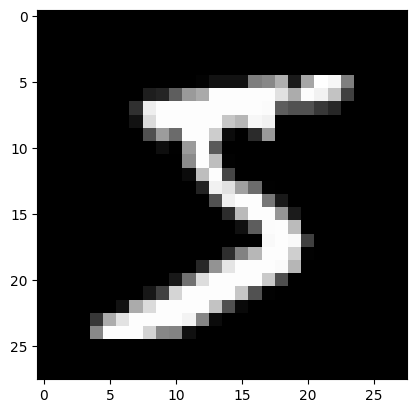

5

In [53]:
plt.imshow(x_train[0], plt.gray())
plt.show()
y_train[0]

### PreProcessing

In [54]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [55]:
x_train = x_train.reshape((-1, 28,28, 1)).astype('float32') / 255

In [56]:
x_test = x_test.reshape((-1, 28,28, 1)).astype('float32') / 255

In [57]:
x_train[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [58]:
x_train.shape

(60000, 28, 28, 1)

### Model Definition

In [59]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding = 'valid', input_shape=(28, 28, 1), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10,  activation = 'sigmoid'))

In [60]:
model.compile(loss = tf.losses.sparse_categorical_crossentropy,  optimizer = tf.optimizers.Adam(),  metrics = ['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2769024   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2770634 (10.57 MB)
Trainable params: 2770634 (10.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
hist = model.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_test, y_test))

Epoch 1/10
235/235 [==============================] - 62s 258ms/step - loss: 0.2090 - accuracy: 0.9422 - val_loss: 0.0746 - val_accuracy: 0.9772
Epoch 2/10
235/235 [==============================] - 50s 214ms/step - loss: 0.0622 - accuracy: 0.9818 - val_loss: 0.0546 - val_accuracy: 0.9816
Epoch 3/10
235/235 [==============================] - 47s 200ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0499 - val_accuracy: 0.9835
Epoch 4/10
235/235 [==============================] - 48s 205ms/step - loss: 0.0239 - accuracy: 0.9934 - val_loss: 0.0492 - val_accuracy: 0.9833
Epoch 5/10
235/235 [==============================] - 47s 199ms/step - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0546 - val_accuracy: 0.9831
Epoch 6/10
235/235 [==============================] - 46s 198ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0575 - val_accuracy: 0.9826
Epoch 7/10
235/235 [==============================] - 48s 203ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0507 - val_ac

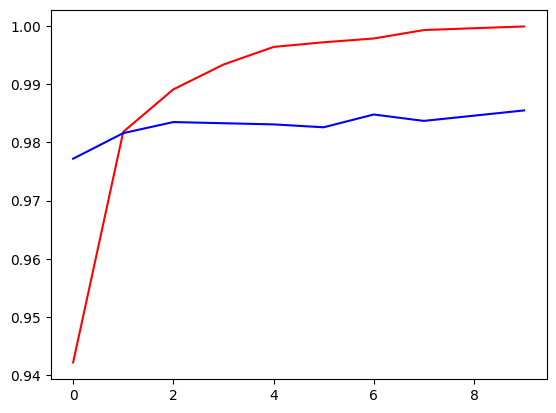

In [64]:
plt.plot(hist.history['accuracy'], color = 'r')
plt.plot(hist.history['val_accuracy'], color = 'b')

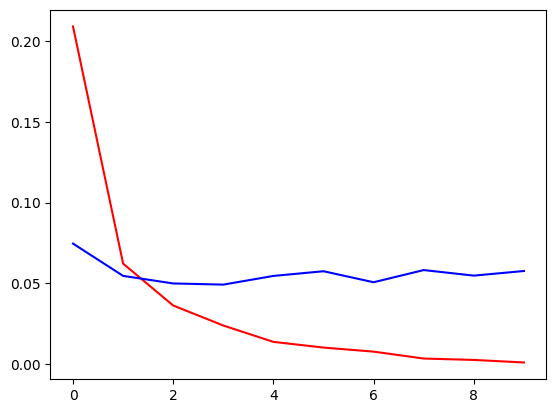

In [65]:
plt.plot(hist.history['loss'], color = 'r')
plt.plot(hist.history['val_loss'], color = 'b')